In [1]:
import pandas as pd
import os
import time
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("../data/train_fe_small.csv")

In [3]:
train.head(10)

,international_plan,voice_mail_plan,area_code_408,area_code_415,area_code_510,region_Midwest,region_Northeast,region_South,region_West,account_length,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.557851,...,0.611765,0.632805,0.284372,0.368421,0.284177,0.455,0.50,0.455556,0.333333,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.376033,...,0.841176,0.481074,0.449473,0.766917,0.449367,0.470,0.35,0.470370,0.222222,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.611570,...,0.482353,0.545455,0.200399,0.375940,0.200000,0.430,0.20,0.429630,0.111111,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.384298,...,0.335294,0.563895,0.365784,0.503759,0.365823,0.520,0.30,0.520370,0.333333,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.400826,...,0.547059,0.379165,0.463422,0.413534,0.463291,0.000,0.00,0.000000,0.000000,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.297521,...,0.670588,0.560984,0.372616,0.458647,0.372785,0.315,0.15,0.314815,0.222222,0.0
6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.619835,...,0.511765,0.396959,0.331625,0.413534,0.331646,0.590,0.25,0.590741,0.000000,0.0
7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.376033,...,0.764706,0.571660,0.455167,0.466165,0.455063,0.510,0.55,0.509259,0.000000,0.0
8,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.177686,...,0.488235,0.452604,0.560774,0.548872,0.560759,0.530,0.10,0.529630,0.111111,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.533058,...,0.635294,0.567130,0.340734,0.451128,0.340506,0.445,0.15,0.444444,0.000000,0.0


In [4]:
cols = ['region_South', 'region_West', 'account_length','number_vmail_messages', 'total_day_minutes', 'total_day_calls',
        'total_intl_charge', 'customer_service_calls', 'churn']

In [5]:
train = train[cols]

In [6]:
x_train_use, y_train_use = train.drop("churn", axis = 1), train["churn"]

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_train_use, y_train_use, train_size=0.8, random_state = 42)

In [8]:
x_train.shape, y_train.shape

((620, 8), (620,))

In [9]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [10]:
num_qubits=len(cols)-1
num_qubits

8

In [11]:
from qiskit.circuit.library import PauliFeatureMap

feature_map = PauliFeatureMap(feature_dimension=num_qubits, reps=1)


In [12]:
from qiskit_machine_learning.algorithms import QSVC

from qiskit import BasicAer
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.kernels import FidelityQuantumKernel



algorithm_globals.random_seed = 12345

qkernel = FidelityQuantumKernel(feature_map=feature_map)


model = QSVC(quantum_kernel=qkernel)


start = time.time()
model.fit(x_train, y_train)
elapsed = time.time() - start
train_score=model.score(x_train, y_train)
qsvc_score = model.score(x_val, y_val)

print(f"QSVC classification test score: {qsvc_score}")

QSVC classification test score: 0.6987179487179487


In [13]:
y_pred = model.predict(x_train)
val_pred=model.predict(x_val)

In [14]:

f1_train=f1_score(y_train, y_pred)

f1_test=f1_score(y_val, val_pred)

In [15]:
prec_train = precision_score(y_train, y_pred)
prec_test = precision_score(y_val, val_pred)

In [16]:
recall_train =recall_score(y_train, y_pred)
recall_test =recall_score(y_val, val_pred)


In [17]:
print(classification_report(y_train, y_pred))

print(classification_report(y_val, val_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       310
         1.0       0.96      0.95      0.95       310

    accuracy                           0.95       620
   macro avg       0.95      0.95      0.95       620
weighted avg       0.95      0.95      0.95       620

              precision    recall  f1-score   support

         0.0       0.69      0.73      0.71        78
         1.0       0.71      0.67      0.69        78

    accuracy                           0.70       156
   macro avg       0.70      0.70      0.70       156
weighted avg       0.70      0.70      0.70       156



In [18]:
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


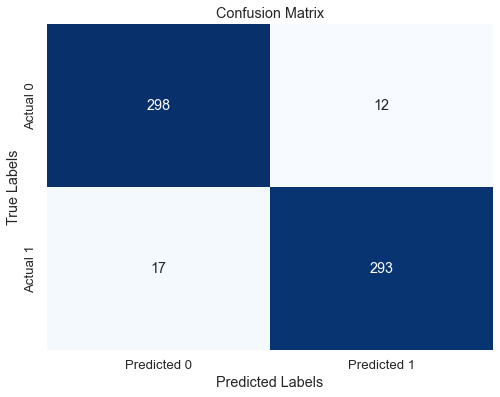

In [19]:
conf = confusion_matrix(y_train, y_pred)
plot_confusion_matrix(conf)

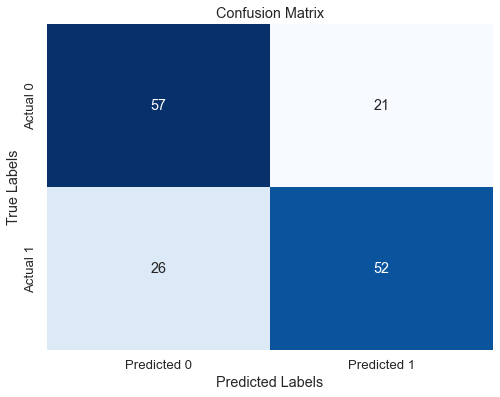

In [20]:
conf = confusion_matrix(y_val, val_pred)
plot_confusion_matrix(conf)

### Extracting results

In [ ]:
model.fit(x_train_use, y_train_use)

In [ ]:
pred_use = model.predict(x_train_use)

In [ ]:
print(classification_report(y_train_use, pred_use))

In [ ]:
f1_train = f1_score(y_train_use, pred_use)
prec_train = precision_score(y_train_use, pred_use)
recall_train = recall_score(y_train_use, pred_use)

In [ ]:
test = pd.read_csv("../data/test_fe.csv")

In [ ]:
test = test[cols]

In [ ]:
x_test, y_test = test.drop("churn", axis =1), test["churn"]

In [ ]:
pred_test = model.predict(x_test)

In [ ]:
print(classification_report(y_test, pred_test))

In [ ]:
f1_test = f1_score(y_test, pred_test)
prec_test = precision_score(y_test, pred_test)
recall_test = recall_score(y_test, pred_test)

In [ ]:
conf = confusion_matrix(y_test, pred_test)

In [ ]:
sns.heatmap(conf, annot=True, cmap="Blues")
#plt.show();

In [ ]:
qsvc_mod_num = "../model/mod_qsvc_pauli.model"
qsvc.save(qsvc_mod_num)

In [ ]:
df = pd.DataFrame()
df["f1_test"] = [f1_test]
df["f1_train"] = f1_train
df["prec_train"] = prec_train
df["prec_test"] = prec_test
df["recall_train"] = recall_train
df["recall_test"] = recall_test
df["model"] = "QSVC"

df.to_csv("../result/regular/qsvc.csv", index = False)  